In [1]:
# torch imports
import torch
# Misc imports
import os 
import sys
import seaborn as sns
from pathlib import Path
sys.path.append('/storage/vbutoi/projects')
sys.path.append('/storage/vbutoi/libraries')
sys.path.append('/storage/vbutoi/projects/ESE')
sys.path.append('/storage/vbutoi/projects/UniverSeg')
# Local imports
from ese.experiment.analysis.analysis_utils.submit_utils import get_ese_inference_configs
# Ionpy imports
from ionpy.util import Config
from ionpy.analysis import ResultsLoader

# Define some useful paths.
os.environ['DATAPATH'] = ':'.join((
       '/storage/vbutoi/datasets',
       '/storage'
))
# Set some defaults
rs = ResultsLoader()
sns.set_style("darkgrid")
torch.set_printoptions(linewidth=200)

# For using code without restarting.
%load_ext autoreload
%autoreload 2
# For using yaml configs.
%load_ext yamlmagic

In [2]:
%%yaml defaults_cfg 

experiment:
    exp_root: '?'
    inference_seed: 40
    hard_pred_threshold: 0.5 

log:
    root: '?'
    log_interval: 10 
    log_image_stats: True 
    log_pixel_stats: False 
    gether_inference_stats: True
    summary_compute_global_metrics: False 

dataloader:
    batch_size: '?'
    num_workers: '?' 
    pin_memory: True 

<IPython.core.display.Javascript object>

In [3]:
%%yaml calibration_cfg 

calibrator:
    _name: None 

local_calibration:
    num_prob_bins: 15
    neighborhood_width: 3

global_calibration:
    num_classes: '?' 
    num_prob_bins: 15
    neighborhood_width: 3

<IPython.core.display.Javascript object>

In [4]:
%%yaml model_cfg 

# For standard datasets
#####################################
data:
    preload: False 

model:
    pred_label: '?' 
    _type: "standard"
    pretrained_exp_root : None
    checkpoint: 'max-val-dice_score'
    pretrained_select_metric: "val-dice_score"

<IPython.core.display.Javascript object>

## Gather Inference Options.

In [5]:
%%yaml experiment_cfg 

# Use this field if you want to call it something else beyond the base_model_dir.
name: "06_27_24_DRIVE_to_STARE_PropAnalysis"

base_model: 
    - "/storage/vbutoi/scratch/ESE/training/06_24_24_DRIVE_Large_DRIVE_CE"
    - "/storage/vbutoi/scratch/ESE/training/06_24_24_DRIVE_Large_DRIVE_Combo"
    - "/storage/vbutoi/scratch/ESE/training/06_24_24_DRIVE_Large_DRIVE_Dice"
    - "/storage/vbutoi/scratch/ESE/training/06_24_24_DRIVE_Large_DRIVE_SVLS_CE"
    - "/storage/vbutoi/scratch/ESE/training/06_24_24_DRIVE_Large_DRIVE_SVLS_Combo"
    - "/storage/vbutoi/scratch/ESE/training/06_24_24_DRIVE_Large_DRIVE_SVLS_Dice"

data:
    # _class: "ese.experiment.datasets.DRIVE"
    # split: ("val", "cal")
    _class: "ese.experiment.datasets.STARE"
    split: ("train", "val", "cal")
    label_threshold: null 

dataloader:
    batch_size: 8
    num_workers: 1

<IPython.core.display.Javascript object>

In [6]:
# Get the configs for the different runs.
base_cfg = Config(defaults_cfg).update([calibration_cfg, model_cfg])
# Get the different experiment cfg yamls.
inf_cfgs = get_ese_inference_configs(
    exp_cfg=experiment_cfg, 
    base_cfg=base_cfg
)

In [7]:
len(inf_cfgs)

48

## Running Jobs

In [8]:
from ese.experiment.analysis.run_inference import get_cal_stats

/local/vbutoi/envs/UniverSegTF/lib/python3.9/site-packages/pydantic/_internal/_fields.py:149: UserWarning: Field "model_outputs" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


Set seed: 40


/storage/vbutoi/projects/ionpy/util/libcheck.py:49: UserWarning: Intel MKL extensions not available for NumPy
  warn("Intel MKL extensions not available for NumPy")
/storage/vbutoi/projects/ionpy/util/libcheck.py:57: UserWarning: Using slow Pillow instead of Pillow-SIMD
  warn("Using slow Pillow instead of Pillow-SIMD")


{'_class': 'ese.experiment.datasets.DRIVE',
 'iters_per_epoch': 1000,
 'label_threshold': 0.5,
 'preload': False,
 'train_splits': 'train',
 'val_splits': 'val',
 'version': 0.2}
{'_class': 'ese.experiment.datasets.STARE',
 'label_threshold': None,
 'preload': False,
 'return_gt_proportion': True,
 'split': '("train", "val", "cal")',
 'version': 1.1}
Running:

calibrator:
  _name: None
data:
  _class: ese.experiment.datasets.STARE
  input_type: image
  label_threshold: null
  preload: false
  return_gt_proportion: true
  split: ("train", "val", "cal")
  version: 1.1
dataloader:
  batch_size: 8
  num_workers: 1
  pin_memory: true
dataset:
  _class: ese.experiment.datasets.STARE
  augmentations: null
  label_threshold: null
  preload: false
  return_data_id: true
  return_gt_proportion: true
  version: 1.1
experiment:
  dataset_name: STARE
  exp_name: 06_27_24_DRIVE_to_STARE_PropAnalysis
  exp_root: /storage/vbutoi/scratch/ESE/inference/06_27_24_DRIVE_to_STARE_PropAnalysis
  hard_pred_th

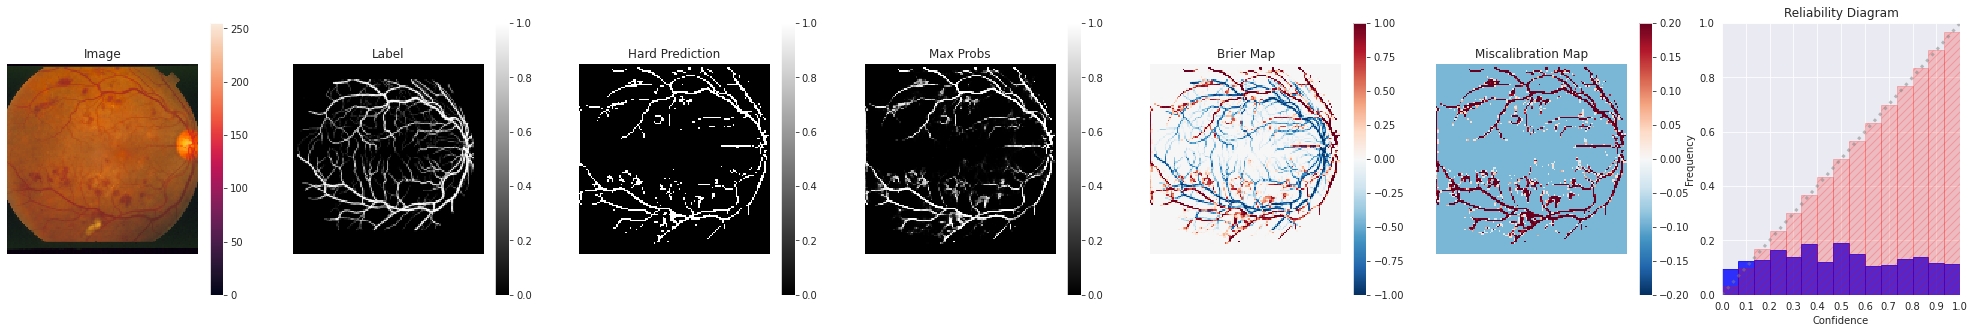

METRICS: 
--------
Dice: 0.10150106996297836
HD95: 11.0
BoundaryIOU: 0.000712758454028517
SoftVolumeError: -136.2628173828125
HardVolumeError: -262.1212158203125
Image_ECE: 0.14610905441918587
Image_Edge-ECE: 0.690786315059551
Image_CW-ECE: 0.14610905945301056
Image_ECW-ECE: 0.6804644465446472
Image_Uniform-CW-ECE: 0.14610905945301056
Image_Uniform-ECW-ECE: 0.6804644465446472

VOLUMES: 
--------
{'gt_volume': 1658.1212158203125,
 'hard_proportion': 0.085205078125,
 'hard_volume': 1396.0,
 'new_gt_proportion': 0.10120368748903275,
 'soft_proportion': 0.09288686513900757,
 'soft_volume': 1521.8583984375}

METADATA: 
---------
{'batch_idx': 0,
 'data_cfg_opt': 'split:train',
 'data_id': 'im0139',
 'gt_proportion': 0.1334498262824443,
 'label_idx': -1,
 'split': 'train'}



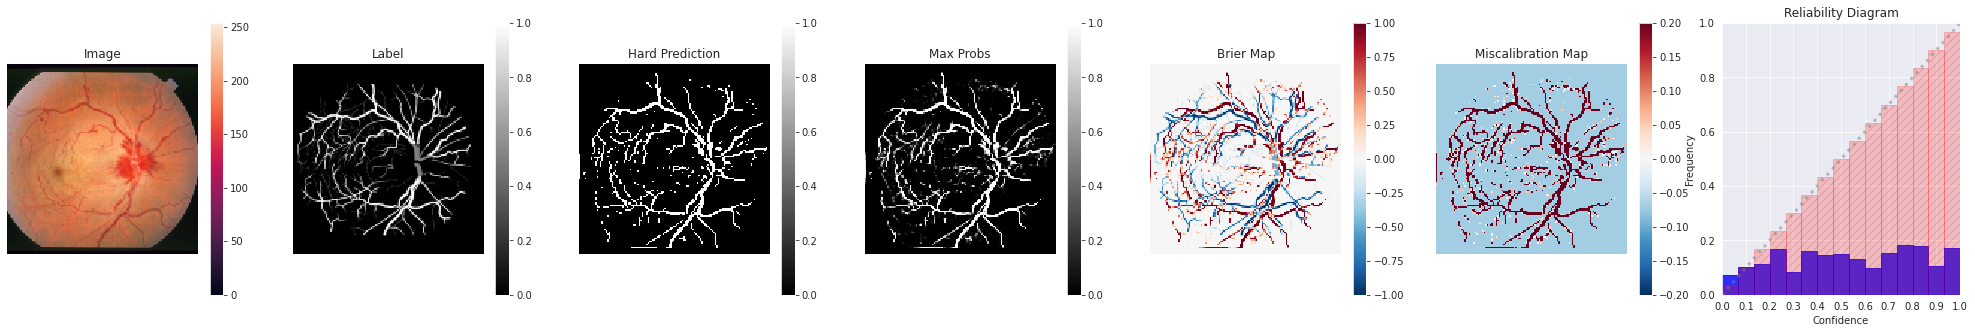

METRICS: 
--------
Dice: 0.16023096442222595
HD95: 5.830951690673828
BoundaryIOU: 0.002486016135662794
SoftVolumeError: 339.6778564453125
HardVolumeError: 217.15185546875
Image_ECE: 0.1359936914644116
Image_Edge-ECE: 0.6016578311120955
Image_CW-ECE: 0.13599368929862976
Image_ECW-ECE: 0.5908728241920471
Image_Uniform-CW-ECE: 0.13599368929862976
Image_Uniform-ECW-ECE: 0.5908728241920471

VOLUMES: 
--------
{'gt_volume': 1385.84814453125,
 'hard_proportion': 0.09783935546875,
 'hard_volume': 1603.0,
 'new_gt_proportion': 0.08458545804023743,
 'soft_proportion': 0.10531774908304214,
 'soft_volume': 1725.5260009765625}

METADATA: 
---------
{'batch_idx': 0,
 'data_cfg_opt': 'split:train',
 'data_id': 'im0005',
 'gt_proportion': 0.10570815450643777,
 'label_idx': -1,
 'split': 'train'}



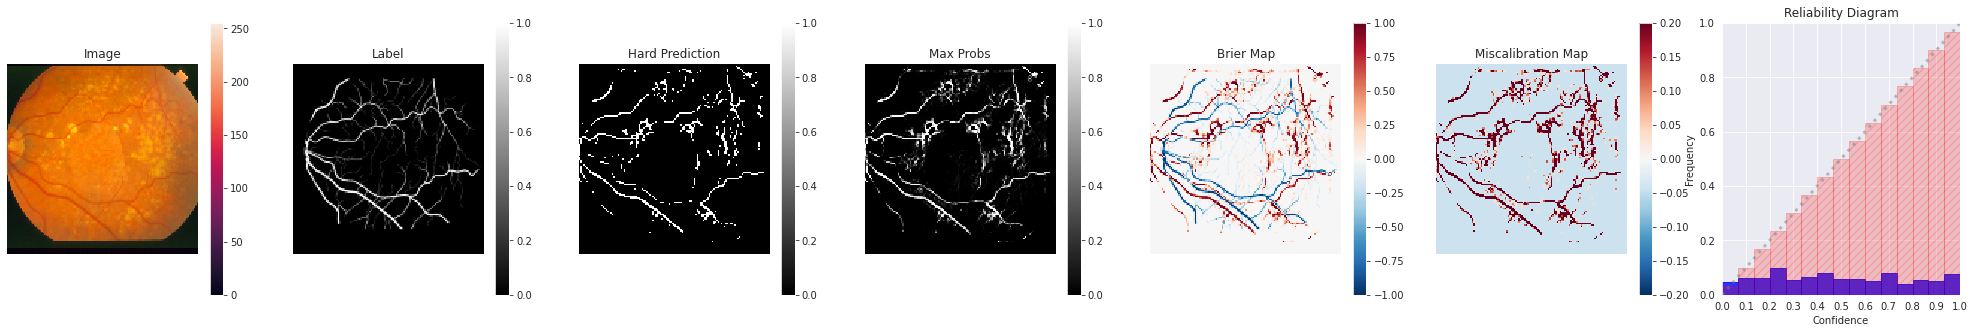

METRICS: 
--------
Dice: 0.05483028665184975
HD95: 10.049875259399414
BoundaryIOU: 1.083423628589486e-10
SoftVolumeError: 282.761962890625
HardVolumeError: 90.29052734375
Image_ECE: 0.09200014278888605
Image_Edge-ECE: 0.5947157302016421
Image_CW-ECE: 0.09200014173984528
Image_ECW-ECE: 0.5441097617149353
Image_Uniform-CW-ECE: 0.09200014173984528
Image_Uniform-ECW-ECE: 0.5441097617149353

VOLUMES: 
--------
{'gt_volume': 831.70947265625,
 'hard_proportion': 0.0562744140625,
 'hard_volume': 922.0,
 'new_gt_proportion': 0.05076351761817932,
 'soft_proportion': 0.06802193820476532,
 'soft_volume': 1114.471435546875}

METADATA: 
---------
{'batch_idx': 0,
 'data_cfg_opt': 'split:train',
 'data_id': 'im0003',
 'gt_proportion': 0.06651543020641733,
 'label_idx': -1,
 'split': 'train'}



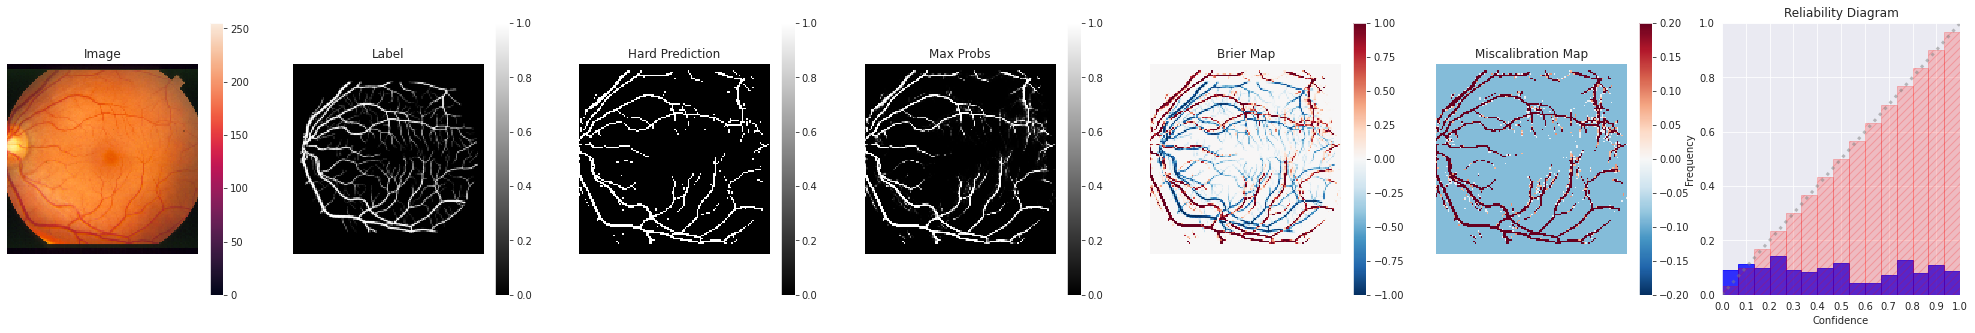

METRICS: 
--------
Dice: 0.07940074801445007
HD95: 8.602325439453125
BoundaryIOU: 6.798096807703047e-11
SoftVolumeError: 93.0186767578125
HardVolumeError: -29.804443359375
Image_ECE: 0.15264505813986015
Image_Edge-ECE: 0.6223442369812985
Image_CW-ECE: 0.1526450514793396
Image_ECW-ECE: 0.6045656800270081
Image_Uniform-CW-ECE: 0.1526450514793396
Image_Uniform-ECW-ECE: 0.6045656800270081

VOLUMES: 
--------
{'gt_volume': 1489.804443359375,
 'hard_proportion': 0.089111328125,
 'hard_volume': 1460.0,
 'new_gt_proportion': 0.09093044698238373,
 'soft_proportion': 0.09660785645246506,
 'soft_volume': 1582.8231201171875}

METADATA: 
---------
{'batch_idx': 0,
 'data_cfg_opt': 'split:train',
 'data_id': 'im0077',
 'gt_proportion': 0.1144206008583691,
 'label_idx': -1,
 'split': 'train'}



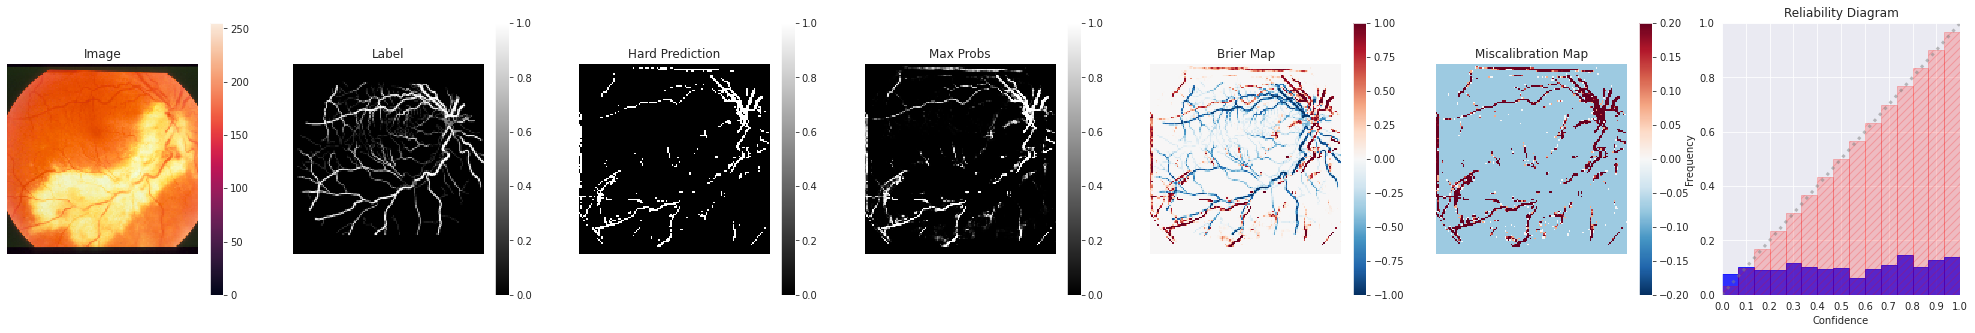

METRICS: 
--------
Dice: 0.10851975530385971
HD95: 12.369317054748535
BoundaryIOU: 0.0009746589930728078
SoftVolumeError: -198.41015625
HardVolumeError: -280.3369140625
Image_ECE: 0.11660624137219729
Image_Edge-ECE: 0.5513108718108636
Image_CW-ECE: 0.11660624295473099
Image_ECW-ECE: 0.5202714800834656
Image_Uniform-CW-ECE: 0.11660624295473099
Image_Uniform-ECW-ECE: 0.5202714800834656

VOLUMES: 
--------
{'gt_volume': 1302.3369140625,
 'hard_proportion': 0.0623779296875,
 'hard_volume': 1022.0,
 'new_gt_proportion': 0.07948833703994751,
 'soft_proportion': 0.06737834215164185,
 'soft_volume': 1103.9267578125}

METADATA: 
---------
{'batch_idx': 0,
 'data_cfg_opt': 'split:train',
 'data_id': 'im0044',
 'gt_proportion': 0.10196198651134274,
 'label_idx': -1,
 'split': 'train'}



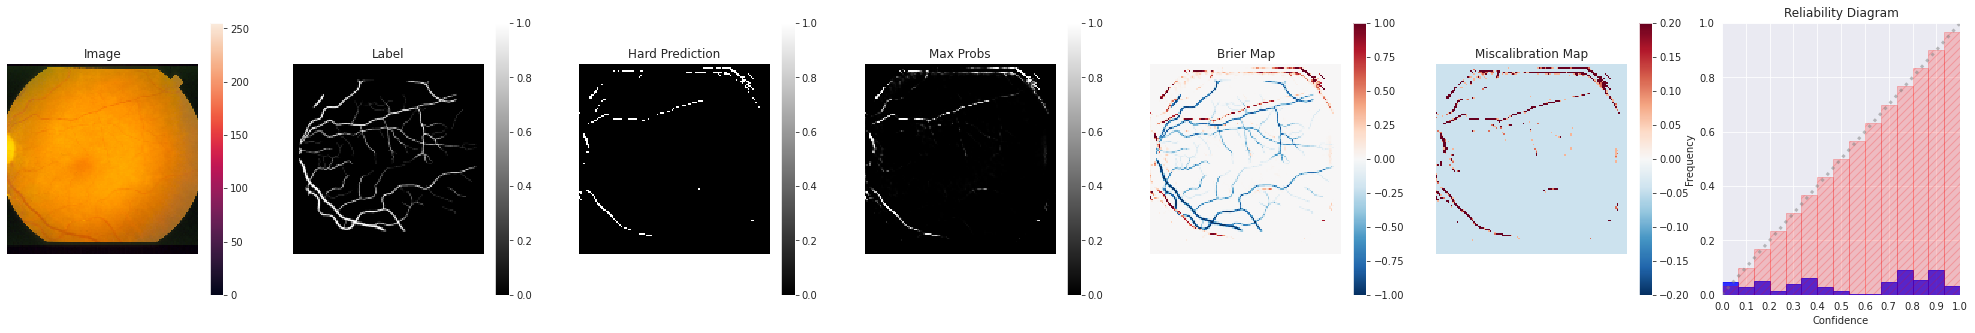

METRICS: 
--------
Dice: 0.02309468761086464
HD95: 29.30182647705078
BoundaryIOU: 4.0485831354075685e-10
SoftVolumeError: -428.45904541015625
HardVolumeError: -502.390380859375
Image_ECE: 0.05773983619750627
Image_Edge-ECE: 0.8842873003575531
Image_CW-ECE: 0.05773983523249626
Image_ECW-ECE: 0.8698387145996094
Image_Uniform-CW-ECE: 0.05773983523249626
Image_Uniform-ECW-ECE: 0.8698387145996094

VOLUMES: 
--------
{'gt_volume': 748.390380859375,
 'hard_proportion': 0.0150146484375,
 'hard_volume': 246.0,
 'new_gt_proportion': 0.04567812383174896,
 'soft_proportion': 0.01952705904841423,
 'soft_volume': 319.93133544921875}

METADATA: 
---------
{'batch_idx': 0,
 'data_cfg_opt': 'split:train',
 'data_id': 'im0319',
 'gt_proportion': 0.058315961577764155,
 'label_idx': -1,
 'split': 'train'}



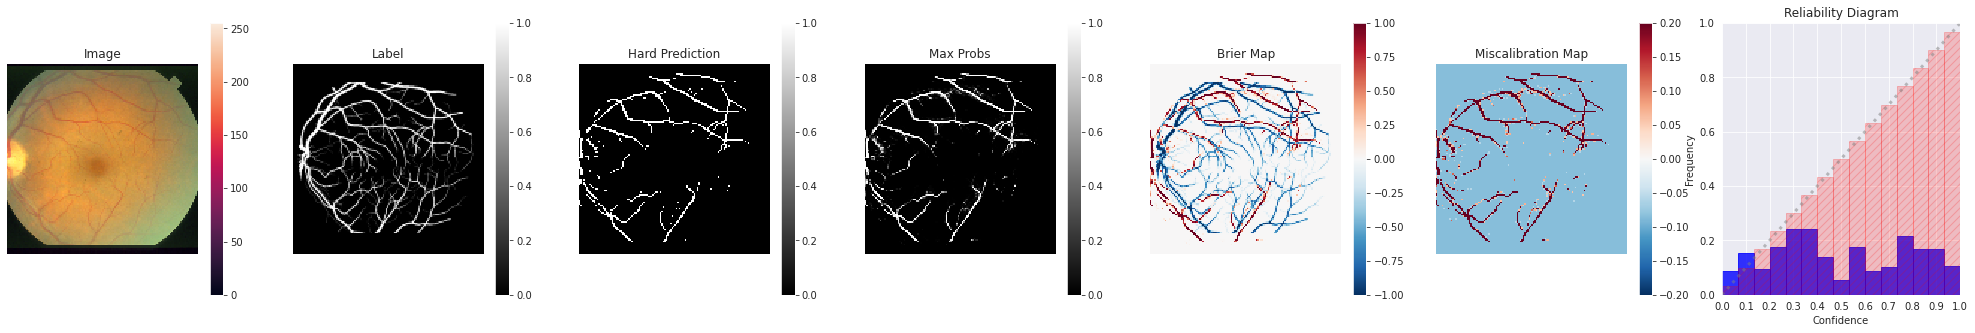

METRICS: 
--------
Dice: 0.09010683000087738
HD95: 14.317821502685547
BoundaryIOU: 0.0047846888191998005
SoftVolumeError: -631.6483154296875
HardVolumeError: -690.808837890625
Image_ECE: 0.11934040141279256
Image_Edge-ECE: 0.6625775113860002
Image_CW-ECE: 0.11934040486812592
Image_ECW-ECE: 0.6488551497459412
Image_Uniform-CW-ECE: 0.11934040486812592
Image_Uniform-ECW-ECE: 0.6488551497459412

VOLUMES: 
--------
{'gt_volume': 1501.808837890625,
 'hard_proportion': 0.04949951171875,
 'hard_volume': 811.0,
 'new_gt_proportion': 0.09166313707828522,
 'soft_proportion': 0.053110383450984955,
 'soft_volume': 870.1605224609375}

METADATA: 
---------
{'batch_idx': 0,
 'data_cfg_opt': 'split:train',
 'data_id': 'im0239',
 'gt_proportion': 0.11188432454526875,
 'label_idx': -1,
 'split': 'train'}



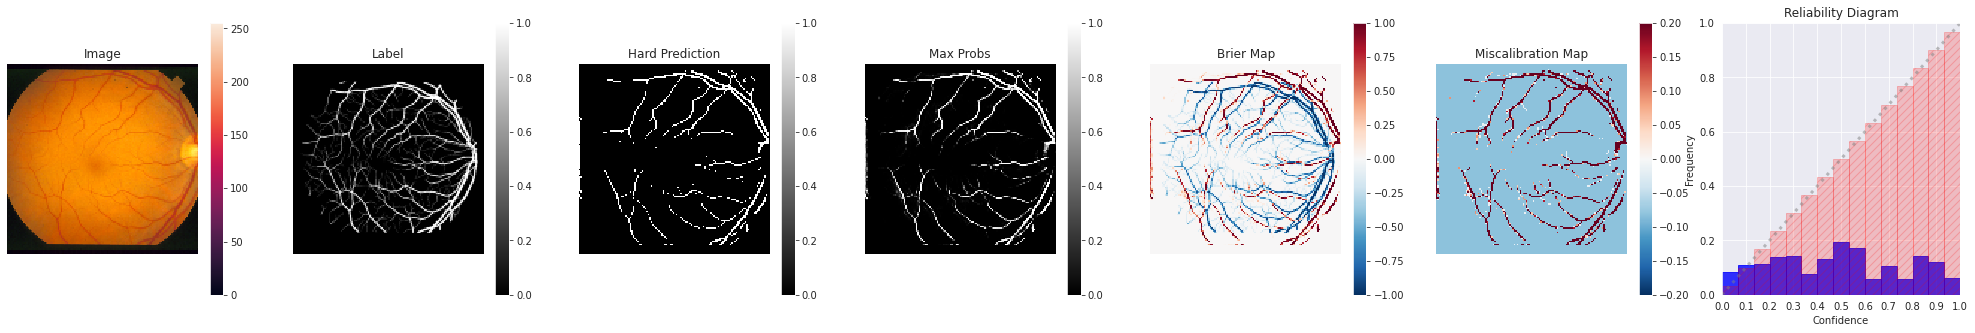

METRICS: 
--------
Dice: 0.07068803161382675
HD95: 9.486832618713379
BoundaryIOU: 1.0030090646928613e-10
SoftVolumeError: -370.977783203125
HardVolumeError: -441.18359375
Image_ECE: 0.12591884736105852
Image_Edge-ECE: 0.6769863073658772
Image_CW-ECE: 0.12591885030269623
Image_ECW-ECE: 0.664995014667511
Image_Uniform-CW-ECE: 0.12591885030269623
Image_Uniform-ECW-ECE: 0.664995014667511

VOLUMES: 
--------
{'gt_volume': 1425.18359375,
 'hard_proportion': 0.06005859375,
 'hard_volume': 984.0,
 'new_gt_proportion': 0.08698630332946777,
 'soft_proportion': 0.06434361636638641,
 'soft_volume': 1054.205810546875}

METADATA: 
---------
{'batch_idx': 0,
 'data_cfg_opt': 'split:train',
 'data_id': 'im0082',
 'gt_proportion': 0.10829756795422031,
 'label_idx': -1,
 'split': 'train'}



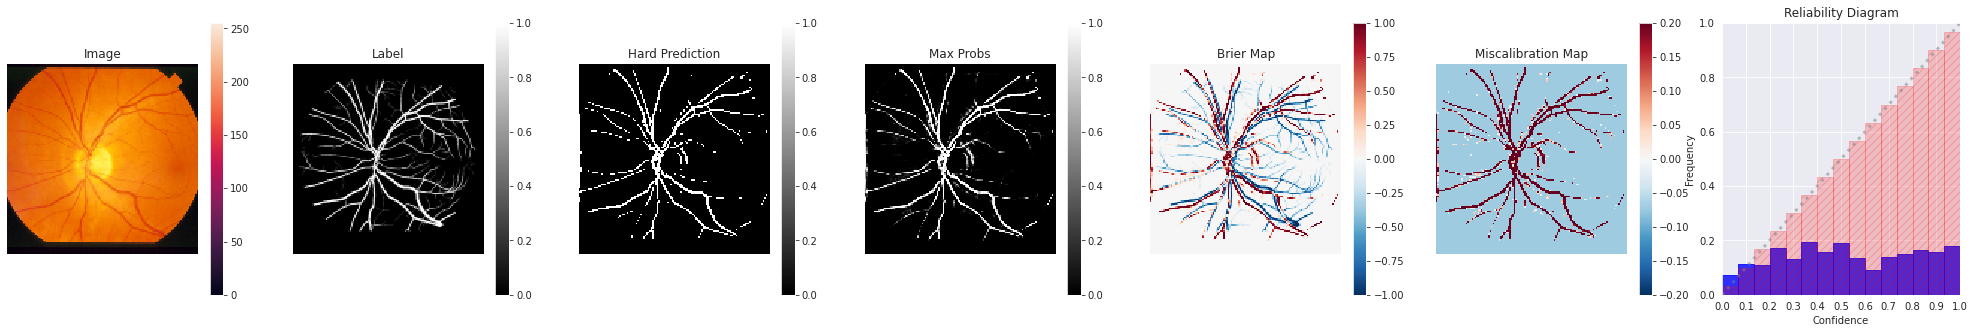

METRICS: 
--------
Dice: 0.15770021080970764
HD95: 10.630146026611328
BoundaryIOU: 0.00162601622287184
SoftVolumeError: -92.81884765625
HardVolumeError: -154.760986328125
Image_ECE: 0.1213202543189584
Image_Edge-ECE: 0.6545434579421014
Image_CW-ECE: 0.12132025510072708
Image_ECW-ECE: 0.6400339007377625
Image_Uniform-CW-ECE: 0.12132025510072708
Image_Uniform-ECW-ECE: 0.6400339007377625

VOLUMES: 
--------
{'gt_volume': 1370.760986328125,
 'hard_proportion': 0.07421875,
 'hard_volume': 1216.0,
 'new_gt_proportion': 0.08366461098194122,
 'soft_proportion': 0.07799939811229706,
 'soft_volume': 1277.942138671875}

METADATA: 
---------
{'batch_idx': 1,
 'data_cfg_opt': 'split:train',
 'data_id': 'im0163',
 'gt_proportion': 0.10186184344982628,
 'label_idx': -1,
 'split': 'train'}



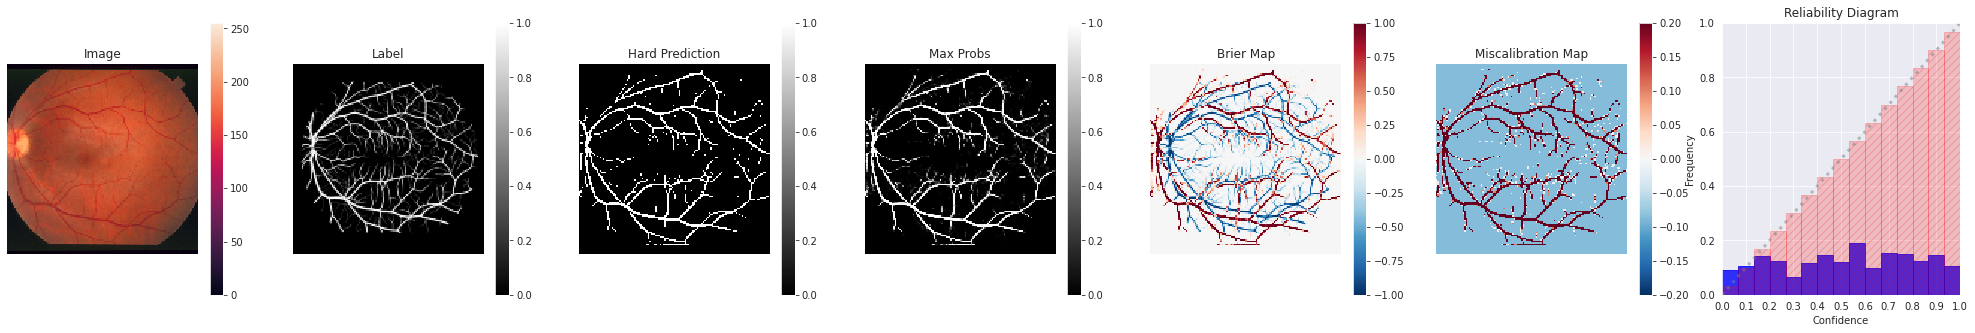

METRICS: 
--------
Dice: 0.0989399328827858
HD95: 6.7082037925720215
BoundaryIOU: 6.565988031059788e-11
SoftVolumeError: 99.158447265625
HardVolumeError: -42.8524169921875
Image_ECE: 0.15168057067844934
Image_Edge-ECE: 0.5835944929179797
Image_CW-ECE: 0.1516805738210678
Image_ECW-ECE: 0.543366551399231
Image_Uniform-CW-ECE: 0.1516805738210678
Image_Uniform-ECW-ECE: 0.543366551399231

VOLUMES: 
--------
{'gt_volume': 1562.8524169921875,
 'hard_proportion': 0.0927734375,
 'hard_volume': 1520.0,
 'new_gt_proportion': 0.09538894146680832,
 'soft_proportion': 0.10144109278917313,
 'soft_volume': 1662.0108642578125}

METADATA: 
---------
{'batch_idx': 1,
 'data_cfg_opt': 'split:train',
 'data_id': 'im0255',
 'gt_proportion': 0.11734314326589004,
 'label_idx': -1,
 'split': 'train'}



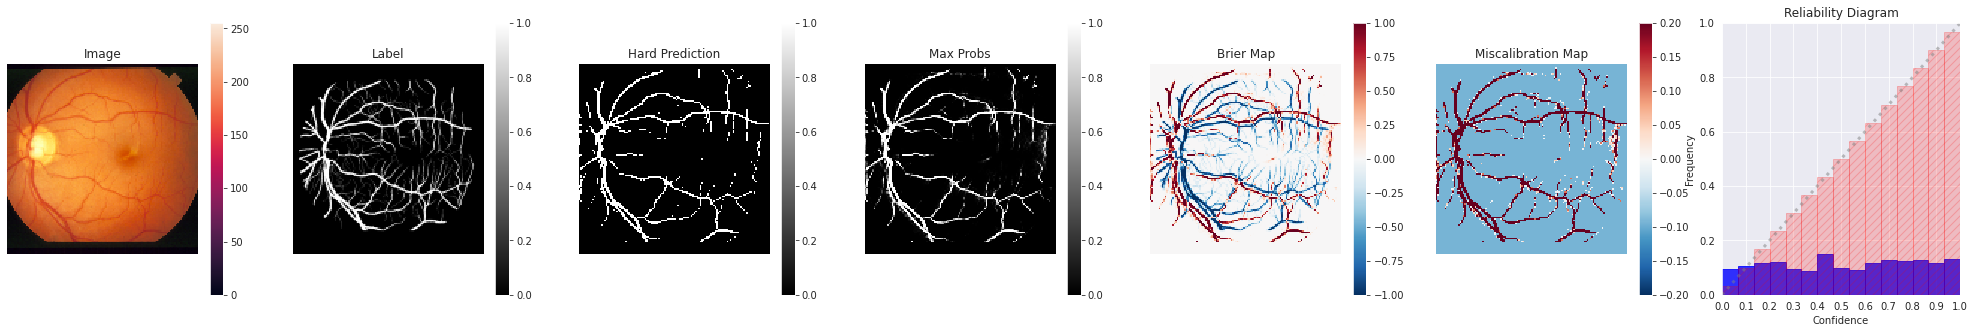

METRICS: 
--------
Dice: 0.10537870228290558
HD95: 9.0
BoundaryIOU: 0.0036900369450449944
SoftVolumeError: -230.19873046875
HardVolumeError: -315.676513671875
Image_ECE: 0.1476751919921638
Image_Edge-ECE: 0.7045219429521024
Image_CW-ECE: 0.14767518639564514
Image_ECW-ECE: 0.7032994627952576
Image_Uniform-CW-ECE: 0.14767518639564514
Image_Uniform-ECW-ECE: 0.7032994627952576

VOLUMES: 
--------
{'gt_volume': 1628.676513671875,
 'hard_proportion': 0.08013916015625,
 'hard_volume': 1313.0,
 'new_gt_proportion': 0.09940652549266815,
 'soft_proportion': 0.08535631000995636,
 'soft_volume': 1398.477783203125}

METADATA: 
---------
{'batch_idx': 1,
 'data_cfg_opt': 'split:train',
 'data_id': 'im0235',
 'gt_proportion': 0.12431228285305539,
 'label_idx': -1,
 'split': 'train'}



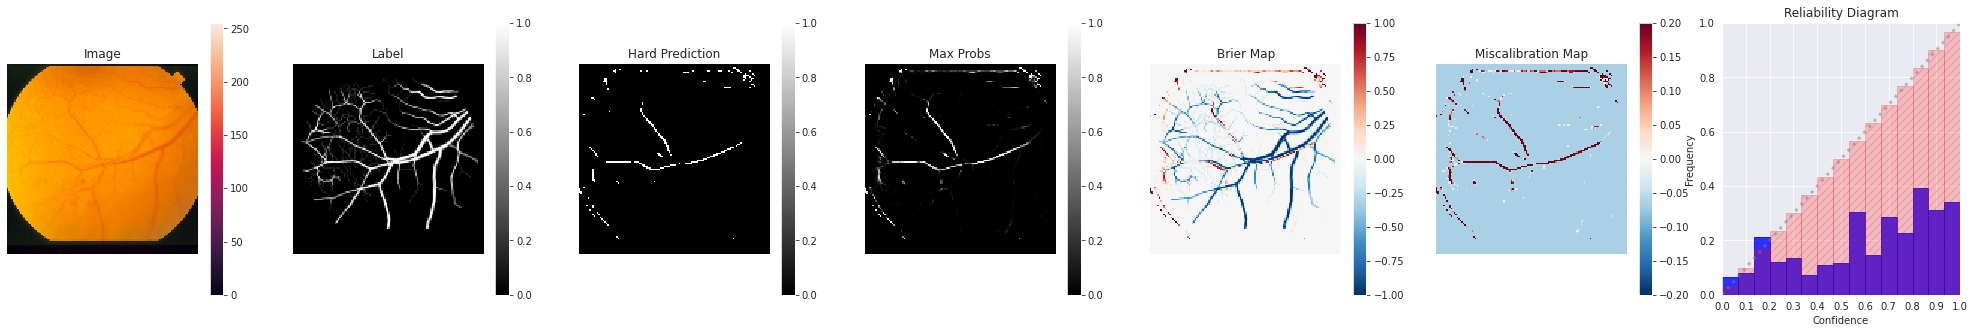

METRICS: 
--------
Dice: 0.11467889696359634
HD95: 22.55658721923828
BoundaryIOU: 0.003496503923088312
SoftVolumeError: -852.919677734375
HardVolumeError: -924.12255859375
Image_ECE: 0.07324328337853515
Image_Edge-ECE: 0.7293302957183176
Image_CW-ECE: 0.07324328273534775
Image_ECW-ECE: 0.7157884240150452
Image_Uniform-CW-ECE: 0.07324328273534775
Image_Uniform-ECW-ECE: 0.7157884240150452

VOLUMES: 
--------
{'gt_volume': 1181.12255859375,
 'hard_proportion': 0.01568603515625,
 'hard_volume': 257.0,
 'new_gt_proportion': 0.07208999991416931,
 'soft_proportion': 0.020031915977597237,
 'soft_volume': 328.2029113769531}

METADATA: 
---------
{'batch_idx': 1,
 'data_cfg_opt': 'split:train',
 'data_id': 'im0324',
 'gt_proportion': 0.0931555283057429,
 'label_idx': -1,
 'split': 'train'}



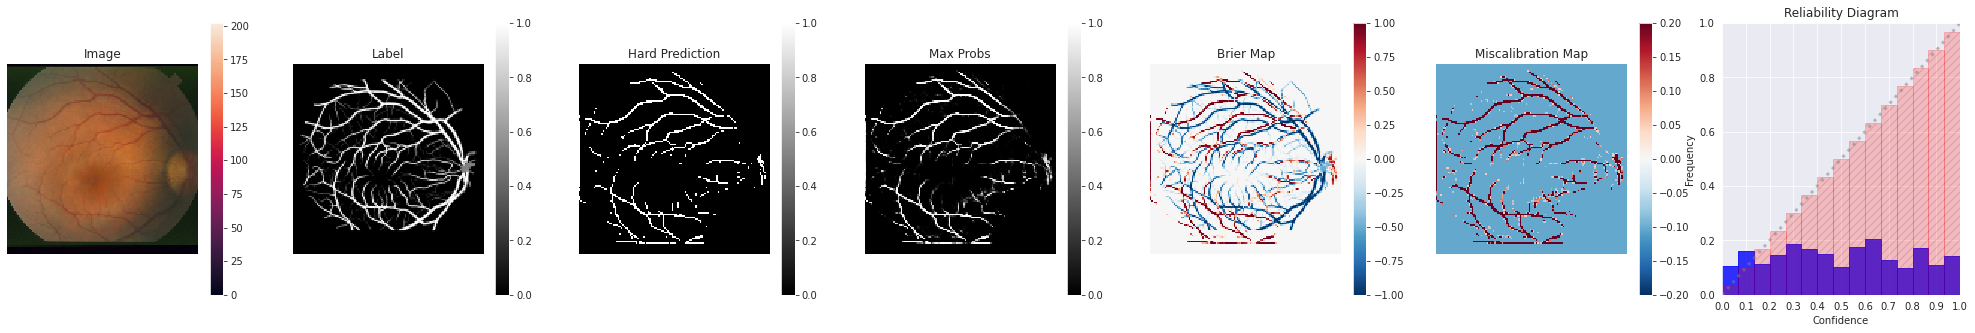

METRICS: 
--------
Dice: 0.09913631528615952
HD95: 8.9442720413208
BoundaryIOU: 0.0009319665841758251
SoftVolumeError: -676.6412353515625
HardVolumeError: -761.809814453125
Image_ECE: 0.14294608781231039
Image_Edge-ECE: 0.7096084527116764
Image_CW-ECE: 0.14294609427452087
Image_ECW-ECE: 0.6970914006233215
Image_Uniform-CW-ECE: 0.14294609427452087
Image_Uniform-ECW-ECE: 0.6970914006233215

VOLUMES: 
--------
{'gt_volume': 1805.809814453125,
 'hard_proportion': 0.063720703125,
 'hard_volume': 1044.0,
 'new_gt_proportion': 0.11021788418292999,
 'soft_proportion': 0.06891898065805435,
 'soft_volume': 1129.1685791015625}

METADATA: 
---------
{'batch_idx': 0,
 'data_cfg_opt': 'split:val',
 'data_id': 'im0240',
 'gt_proportion': 0.13670754138565297,
 'label_idx': -1,
 'split': 'val'}



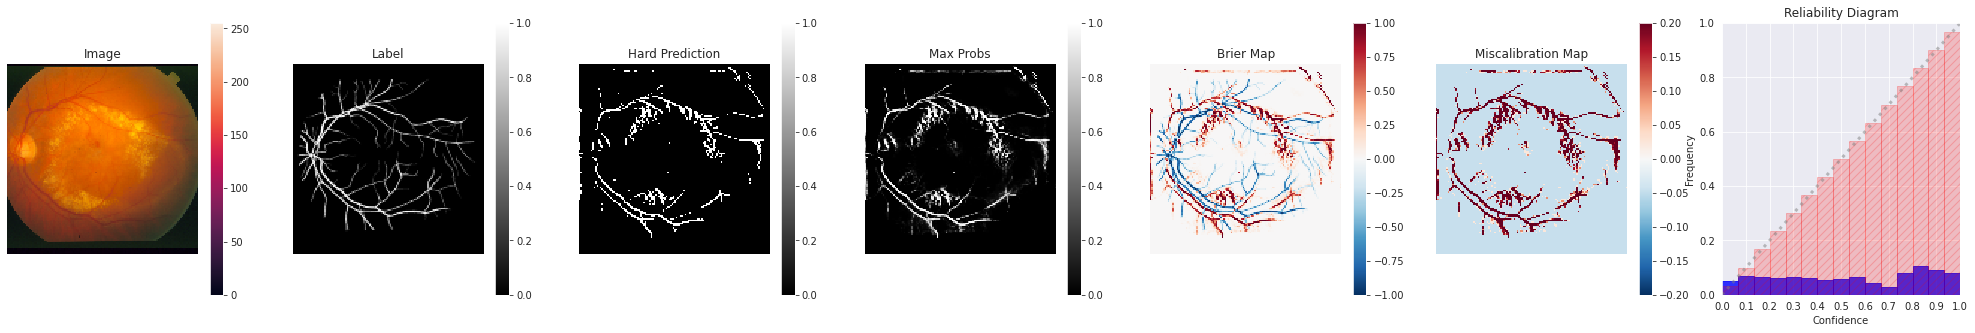

METRICS: 
--------
Dice: 0.07092198729515076
HD95: 11.180339813232422
BoundaryIOU: 1.017294026794957e-10
SoftVolumeError: 265.2186279296875
HardVolumeError: 115.1124267578125
Image_ECE: 0.09514380950575352
Image_Edge-ECE: 0.7245296229620585
Image_CW-ECE: 0.09514380991458893
Image_ECW-ECE: 0.6915556192398071
Image_Uniform-CW-ECE: 0.09514380991458893
Image_Uniform-ECW-ECE: 0.6915556192398071

VOLUMES: 
--------
{'gt_volume': 866.8875732421875,
 'hard_proportion': 0.0599365234375,
 'hard_volume': 982.0,
 'new_gt_proportion': 0.05291061848402023,
 'soft_proportion': 0.06909827888011932,
 'soft_volume': 1132.106201171875}

METADATA: 
---------
{'batch_idx': 0,
 'data_cfg_opt': 'split:val',
 'data_id': 'im0002',
 'gt_proportion': 0.0676824034334764,
 'label_idx': -1,
 'split': 'val'}



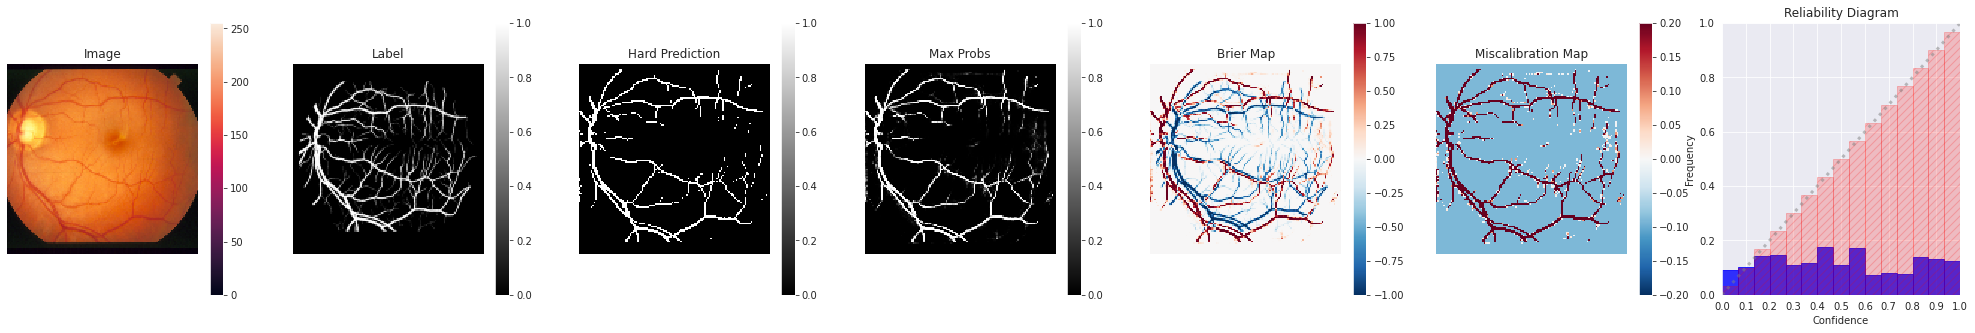

METRICS: 
--------
Dice: 0.10487444698810577
HD95: 10.770329475402832
BoundaryIOU: 0.0015197568573057652
SoftVolumeError: -203.24169921875
HardVolumeError: -309.46826171875
Image_ECE: 0.1429765837960862
Image_Edge-ECE: 0.7500806561356123
Image_CW-ECE: 0.1429765820503235
Image_ECW-ECE: 0.7401697039604187
Image_Uniform-CW-ECE: 0.1429765820503235
Image_Uniform-ECW-ECE: 0.7401697039604187

VOLUMES: 
--------
{'gt_volume': 1586.46826171875,
 'hard_proportion': 0.07794189453125,
 'hard_volume': 1277.0,
 'new_gt_proportion': 0.0968303382396698,
 'soft_proportion': 0.08442544937133789,
 'soft_volume': 1383.2265625}

METADATA: 
---------
{'batch_idx': 0,
 'data_cfg_opt': 'split:cal',
 'data_id': 'im0236',
 'gt_proportion': 0.11788064582055999,
 'label_idx': -1,
 'split': 'cal'}



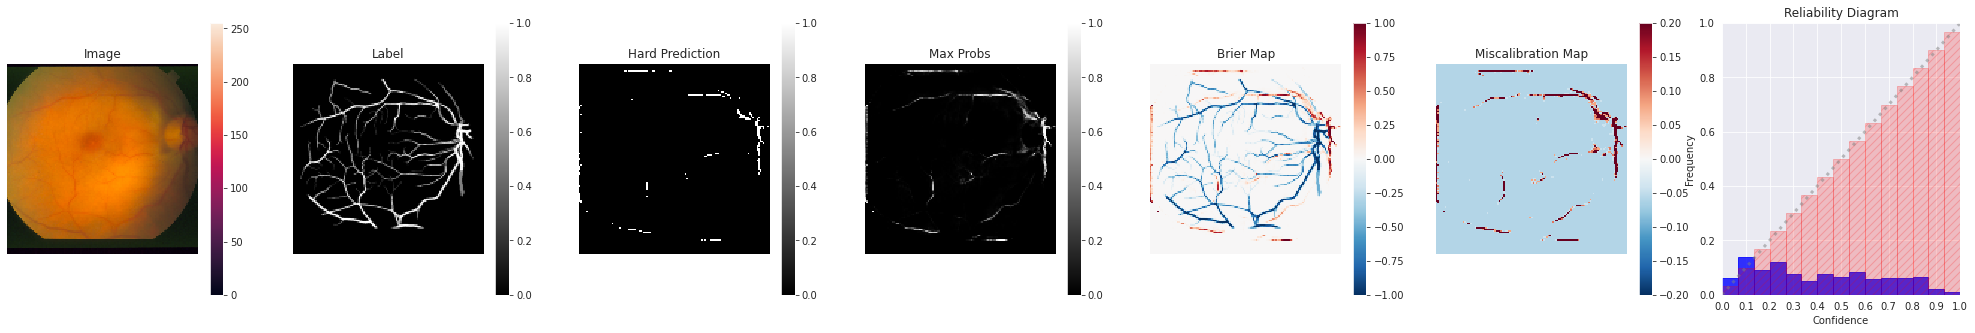

METRICS: 
--------
Dice: 0.01105990819633007
HD95: 24.1867733001709
BoundaryIOU: 4.694835631369187e-10
SoftVolumeError: -714.5849609375
HardVolumeError: -841.43994140625
Image_ECE: 0.06958955047361143
Image_Edge-ECE: 0.8470690912035321
Image_CW-ECE: 0.06958954781293869
Image_ECW-ECE: 0.8409985899925232
Image_Uniform-CW-ECE: 0.06958954781293869
Image_Uniform-ECW-ECE: 0.8409985899925232

VOLUMES: 
--------
{'gt_volume': 1043.43994140625,
 'hard_proportion': 0.0123291015625,
 'hard_volume': 202.0,
 'new_gt_proportion': 0.06368651986122131,
 'soft_proportion': 0.020071715116500854,
 'soft_volume': 328.85498046875}

METADATA: 
---------
{'batch_idx': 0,
 'data_cfg_opt': 'split:cal',
 'data_id': 'im0004',
 'gt_proportion': 0.08394849785407725,
 'label_idx': -1,
 'split': 'cal'}



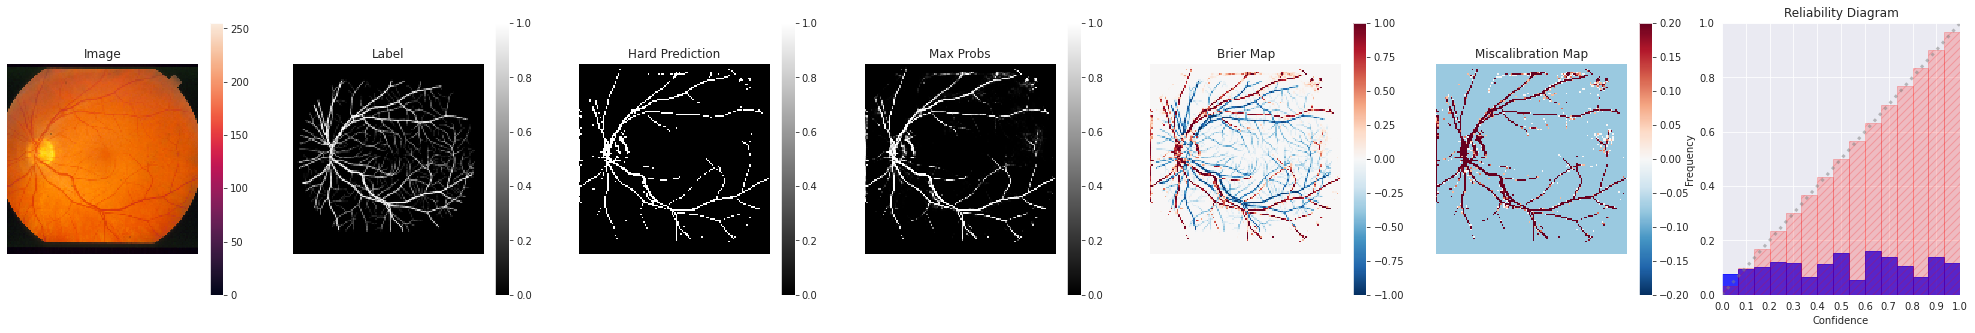

METRICS: 
--------
Dice: 0.10478589683771133
HD95: 11.180339813232422
BoundaryIOU: 9.718172794270785e-11
SoftVolumeError: -211.3350830078125
HardVolumeError: -293.487060546875
Image_ECE: 0.11794599697512972
Image_Edge-ECE: 0.5886024784607191
Image_CW-ECE: 0.11794599890708923
Image_ECW-ECE: 0.538339376449585
Image_Uniform-CW-ECE: 0.11794599890708923
Image_Uniform-ECW-ECE: 0.538339376449585

VOLUMES: 
--------
{'gt_volume': 1321.487060546875,
 'hard_proportion': 0.062744140625,
 'hard_volume': 1028.0,
 'new_gt_proportion': 0.08065716922283173,
 'soft_proportion': 0.06775829941034317,
 'soft_volume': 1110.1519775390625}

METADATA: 
---------
{'batch_idx': 0,
 'data_cfg_opt': 'split:cal',
 'data_id': 'im0162',
 'gt_proportion': 0.10134069078275088,
 'label_idx': -1,
 'split': 'cal'}



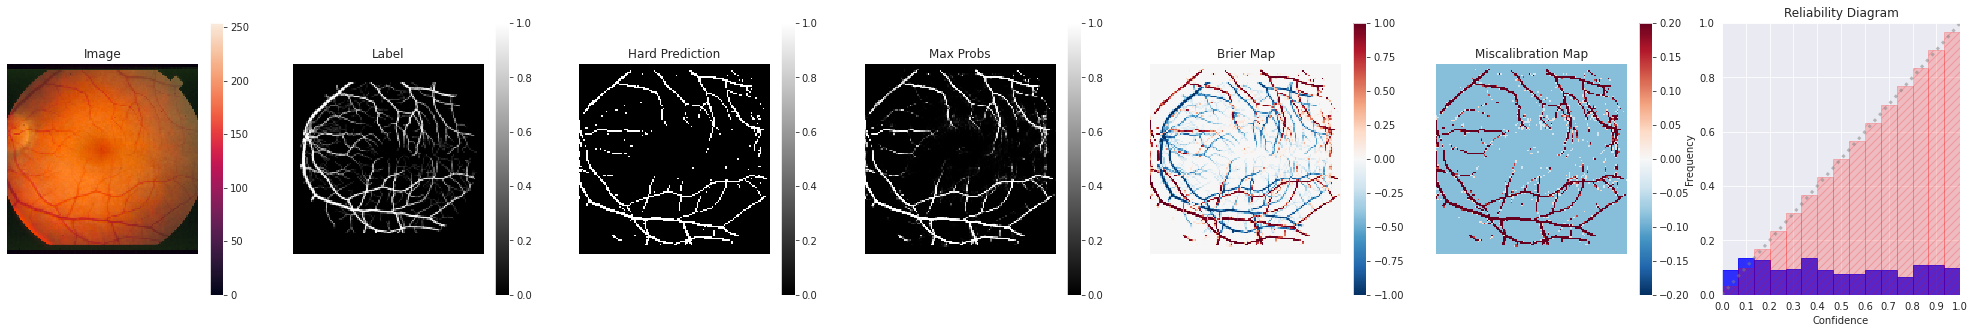

METRICS: 
--------
Dice: 0.07873376458883286
HD95: 9.05538558959961
BoundaryIOU: 0.00238663493655622
SoftVolumeError: -133.282958984375
HardVolumeError: -253.27783203125
Image_ECE: 0.13989890683700318
Image_Edge-ECE: 0.5439991627131113
Image_CW-ECE: 0.13989891111850739
Image_ECW-ECE: 0.5439991354942322
Image_Uniform-CW-ECE: 0.13989891111850739
Image_Uniform-ECW-ECE: 0.5439991354942322

VOLUMES: 
--------
{'gt_volume': 1504.27783203125,
 'hard_proportion': 0.07635498046875,
 'hard_volume': 1251.0,
 'new_gt_proportion': 0.0918138325214386,
 'soft_proportion': 0.08367888629436493,
 'soft_volume': 1370.994873046875}

METADATA: 
---------
{'batch_idx': 0,
 'data_cfg_opt': 'split:cal',
 'data_id': 'im0081',
 'gt_proportion': 0.12029021050480278,
 'label_idx': -1,
 'split': 'cal'}



In [9]:
from ese.experiment.experiment import run_ese_exp

###### Run individual jobs
run_ese_exp(
    config=inf_cfgs[0], 
    job_func=get_cal_stats,
    run_name='debug',
    # run_name=exp_name,
    show_examples=True,
    gpu='1',
) 

In [10]:
# from ese.experiment.experiment import submit_ese_exps 

# #### Run Batch Jobs
# submit_ese_exps(
#     config_list=inf_cfgs,
#     job_func=get_cal_stats,
#     available_gpus=['0', '1', '2', '3']
# )